# INTRODUCTION

# Problem Statement

# Objectives

# Data loading

First, we import the necessary python libraries

In [33]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Next we load the dataset using pandas, and look at the first 5 rows.

In [34]:
data = pd.read_csv('./data/kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [35]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


## Description of columns

In [36]:
data.shape

(21597, 21)

The dataset contains 21 columns and 21,597 rows.

Now to go into more detail on the columns we have. We will use the `column_names.md` file to get more information about our columns.

In [37]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
* `view` - Quality of view from house. An index from 0 to 4 of how good the view of the property was.
* `condition` - How good the overall condition of the house is. Related to maintenance of house. An index from 1 to 5 on the condition of the house.
* `grade` - Overall grade of the house. Related to the construction and design of the house, where 1-3 is poor, 4-6 is low average, 7 is average, 8-9 is good, and 10-13 is excellent.
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `zipcode` - ZIP Code used by the United States Postal Service
* `lat` - Latitude coordinate
* `long` - Longitude coordinate
* `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors
* `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors

# Initial Data Exploration

In [38]:
# Looking at a summary of column data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [39]:
# Looking for null values
data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Initial Observations
1. Missing Values:

    `waterfront` has some missing values.

    `view` has a few missing values.

    `yr_renovated` has many missing values (likely indicates houses that were never renovated).

2. Data Cleaning Needed:

    `sqft_basement` appears to have mixed types and needs cleaning.
    
    `date` should be converted to a datetime format for proper analysis.

In [40]:
# Get the unique entries in the 'waterfront', 'view' and 'yr_renovated' 
# columns and their counts

waterfront_unique_counts = data['waterfront'].value_counts()
view_unique_counts = data['view'].value_counts()
yr_renovated_unique_counts = data['yr_renovated'].value_counts()

waterfront_unique_counts, view_unique_counts, yr_renovated_unique_counts

(waterfront
 NO     19075
 YES      146
 Name: count, dtype: int64,
 view
 NONE         19422
 AVERAGE        957
 GOOD           508
 FAIR           330
 EXCELLENT      317
 Name: count, dtype: int64,
 yr_renovated
 0.0       17011
 2014.0       73
 2013.0       31
 2003.0       31
 2007.0       30
           ...  
 1951.0        1
 1953.0        1
 1946.0        1
 1976.0        1
 1948.0        1
 Name: count, Length: 70, dtype: int64)

Srategies for dealing eith the missing values:

1. `waterfront` (2,376 missing values):

    Since waterfront is a categorical variable, we can fill the missing values with the most frequent category: 'NO'

2. `view` (63 missing values):
    
    Fill the missing values with the most frequent category: NONE

3. `yr_renovated` (3,842 missing values):
    
    Since it is a numerical variable, we can fill the missing values with the median value. 
    
    A value of 0 might indicate that the house was never renovated.

In [41]:
# Impute missing values for 'waterfront' with 'NO'
data['waterfront'] = data['waterfront'].fillna('NO')

# Impute missing values for 'view' with the most frequent category (mode)
data['view'] = data['view'].fillna(data['view'].mode()[0])

# Impute missing values for 'yr_renovated' with 0
data['yr_renovated'] = data['yr_renovated'].fillna(0)

# Verify if there are any missing values left
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [42]:
# Convert `date` to datetime
data['date'] = pd.to_datetime(data['date'])

# Clean `sqft_basement` column by converting it to numeric, 
# coercing errors to NaN, and filling with 0
data['sqft_basement'] = pd.to_numeric(data['sqft_basement'], errors='coerce').fillna(0)


In [44]:
# Verify the cleaning steps
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Summary Statistics

In [47]:
data.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,2014-10-29 04:20:38.171968512,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,285.716581,1970.999676,68.758207,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
min,1.000102e+06,2014-05-02 00:00:00,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,2014-07-22 00:00:00,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,2014-10-16 00:00:00,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,2015-02-17 00:00:00,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,550.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,2015-05-27 00:00:00,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000
std,2.876736e+09,NaN,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,439.819830,29.375234,364.037499,53.513072,0.138552,0.140724,685.230472,27274.441950


## Initial visualizations

First we can have a look at the distribution of our numerical variables

/opt/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

<Figure size 1400x1000 with 0 Axes>

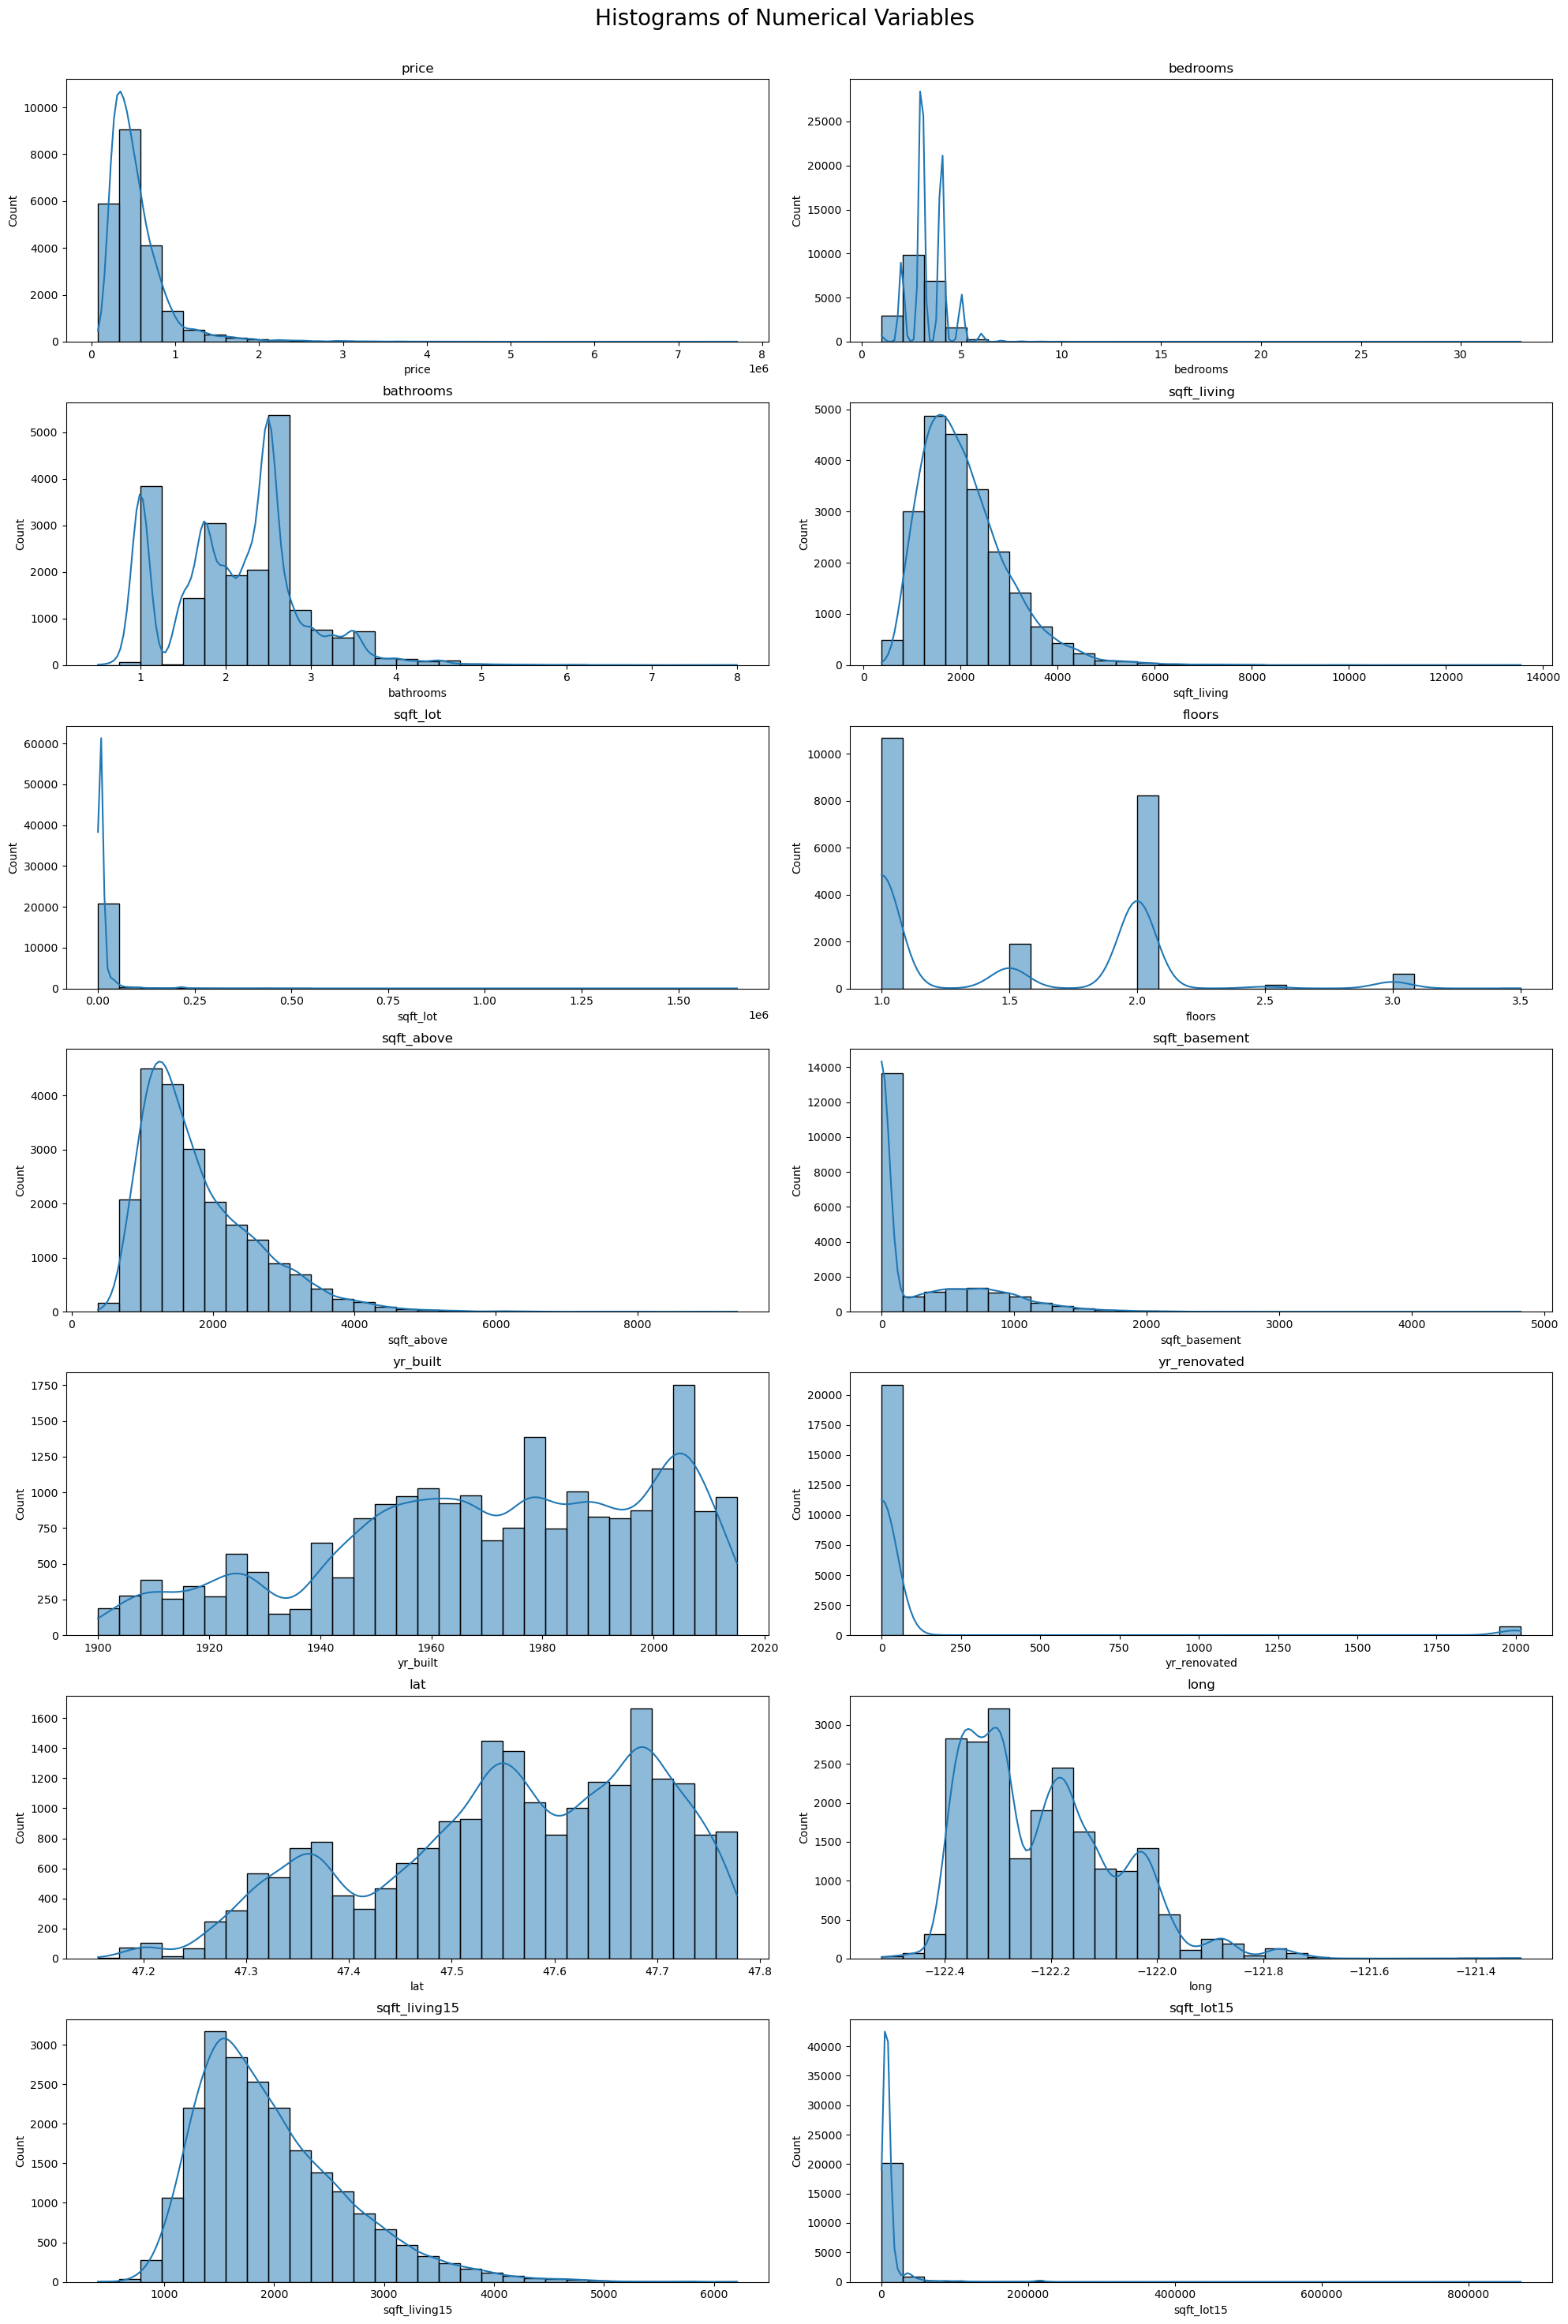

In [54]:
plt.figure(figsize=(14, 10))

# List of numerical variables
numerical_vars = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
                  'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 
                  'sqft_living15', 'sqft_lot15']

# Create histograms for numerical variables
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(20, 30))
fig.suptitle('Histograms of Numerical Variables', fontsize=20)
axes = axes.flatten()

for ax, var in zip(axes, numerical_vars):
    sns.histplot(data[var], bins=30, kde=True, ax=ax)
    ax.set_title(var)

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()


### Observations


## Calculating the correlation matrix

In [50]:
# selecting numerical columns
numerical_columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

# Calculating the correlation matrix
correlation_matrix = data[numerical_columns].corr()

correlation_matrix

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.605368,0.321108,0.053953,0.117855,0.306692,0.022036,0.585241,0.082845
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.479386,0.297229,0.155670,0.017900,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.686668,0.278485,0.507173,0.047177,0.024280,0.224903,0.569884,0.088303
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.876448,0.428660,0.318152,0.051060,0.052155,0.241214,0.756402,0.184342
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.184139,0.015031,0.052946,0.004979,-0.085514,0.230227,0.144763,0.718204
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.523989,-0.241866,0.489193,0.003793,0.049239,0.125943,0.280102,-0.010722
sqft_above,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,1.000000,-0.051175,0.424037,0.020645,-0.001199,0.344842,0.731767,0.195077
sqft_basement,0.321108,0.297229,0.278485,0.428660,0.015031,-0.241866,-0.051175,1.000000,-0.130085,0.065008,0.109853,-0.142369,0.199288,0.015885
yr_built,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,0.424037,-0.130085,1.000000,-0.202555,-0.148370,0.409993,0.326377,0.070777
yr_renovated,0.117855,0.017900,0.047177,0.051060,0.004979,0.003793,0.020645,0.065008,-0.202555,1.000000,0.027970,-0.064543,0.000683,0.004286


### Visualizing The Correlation Matrix

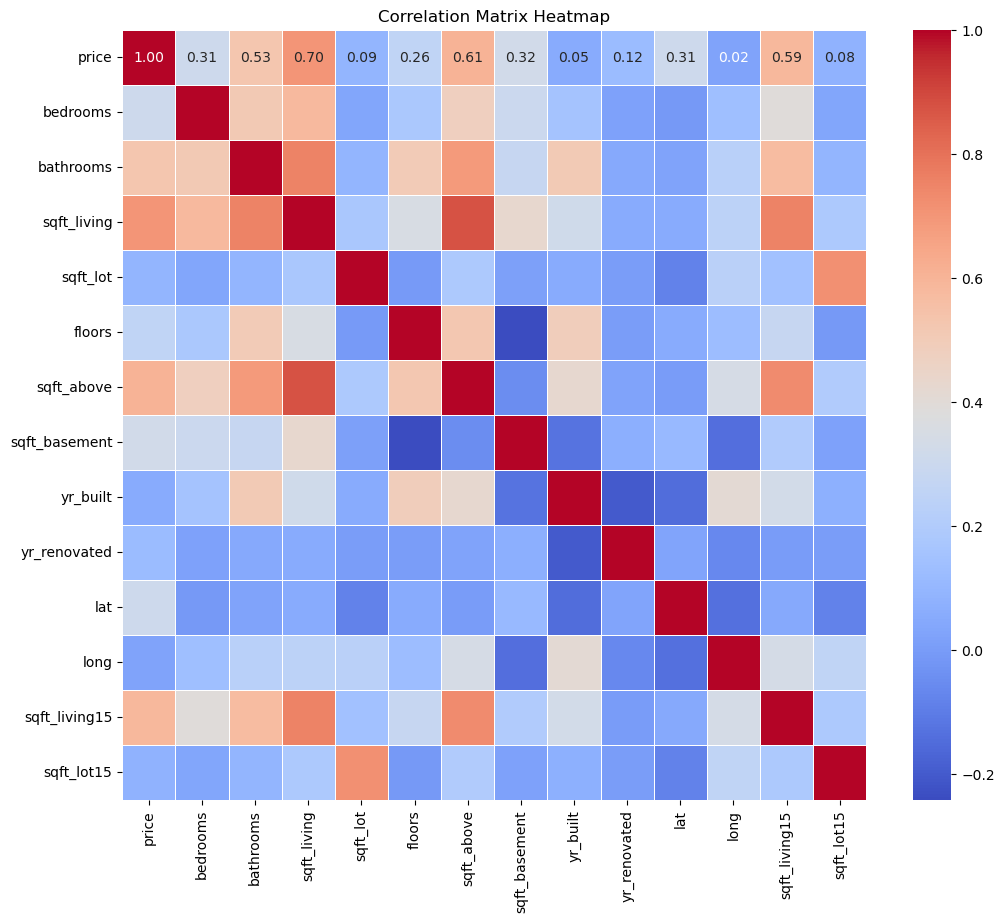

In [51]:
# Plotting the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


In [53]:
# Extract correlations with price and sort them in descending order
price_correlations = correlation_matrix['price'].sort_values(ascending=False)

# Select only positive correlations
positive_price_correlations = price_correlations[price_correlations > 0]
positive_price_correlations

price            1.000000
sqft_living      0.701917
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
sqft_basement    0.321108
bedrooms         0.308787
lat              0.306692
floors           0.256804
yr_renovated     0.117855
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
long             0.022036
Name: price, dtype: float64

**Top Correlations with price**:

`sqft_living`: 0.7019

`bathrooms`: 0.5259

`sqft_above`: 0.6054

`sqft_living15`: 0.5852

`sqft_basement`: 0.321108

`bedrooms` : 0.308787

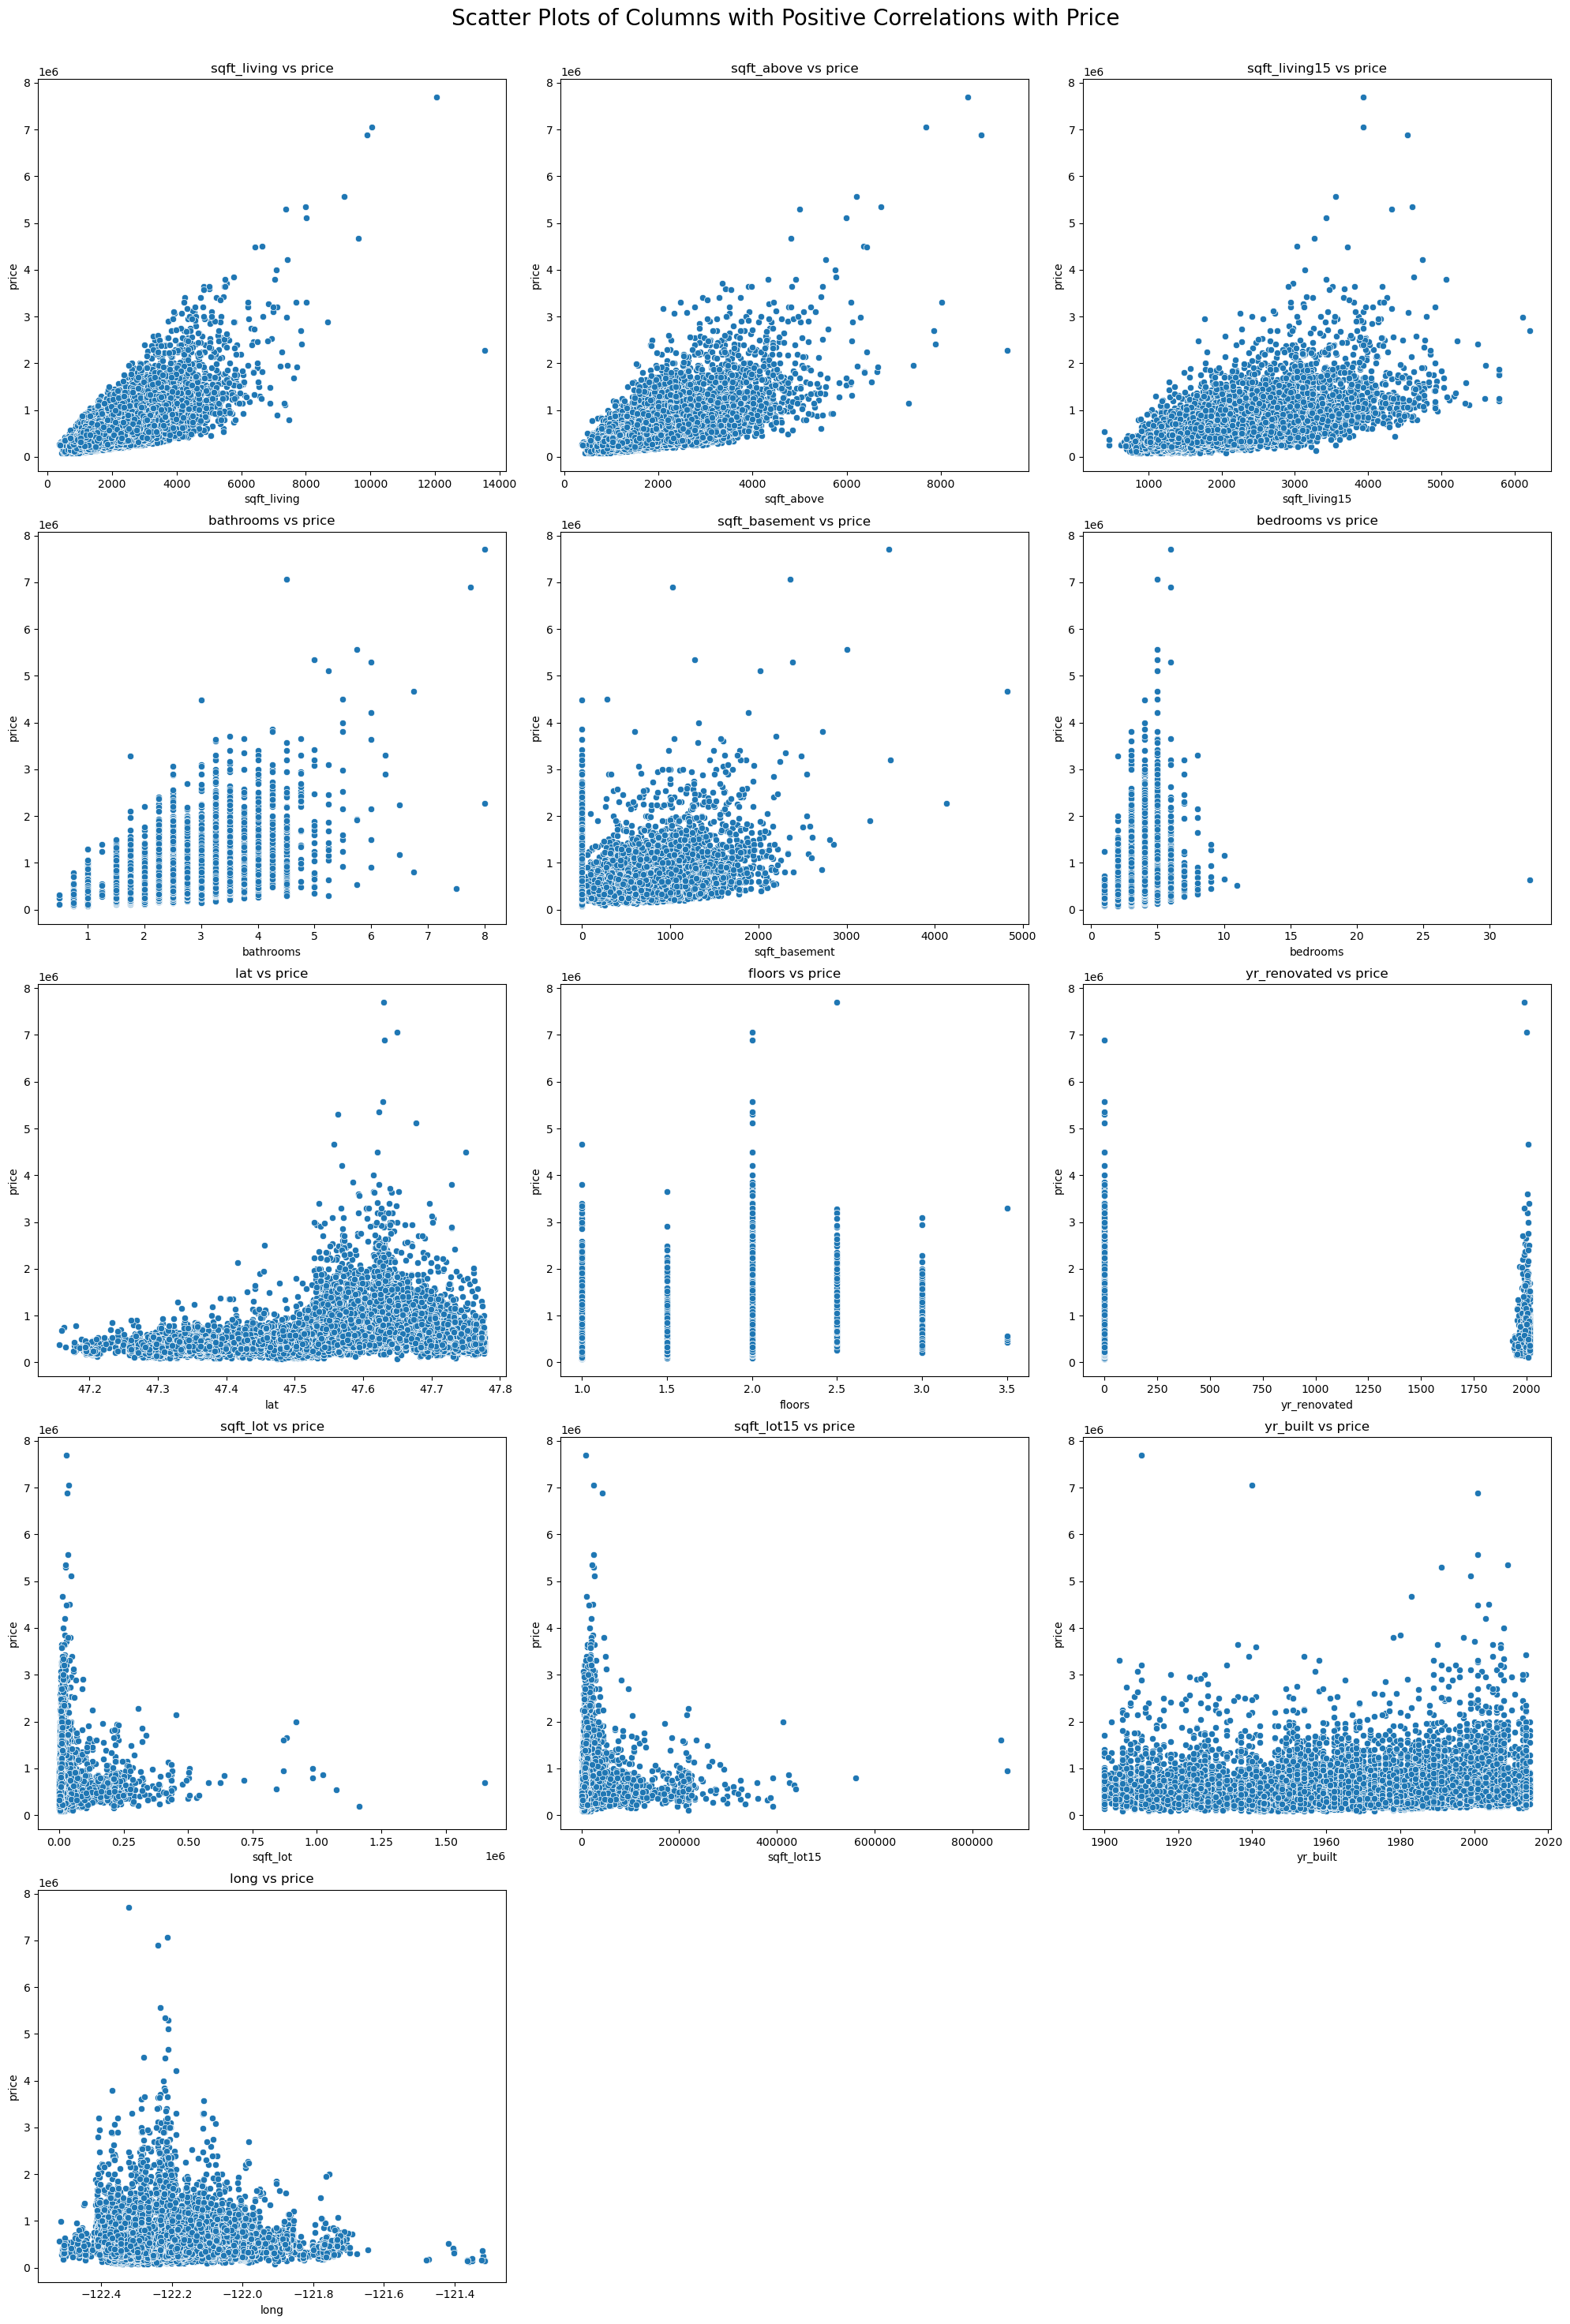

In [61]:
# Visualize scatter plots of all columns with positive correlations with 'price'
positive_correlation_columns = ['sqft_living', 'sqft_above', 'sqft_living15', 'bathrooms', 'sqft_basement', 'bedrooms', 'lat', 'floors', 'yr_renovated', 'sqft_lot', 'sqft_lot15', 'yr_built', 'long']

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20, 30))
fig.suptitle('Scatter Plots of Columns with Positive Correlations with Price', fontsize=20)
axes = axes.flatten()

for ax, var in zip(axes, positive_correlation_columns):
    sns.scatterplot(x=data[var], y=data['price'], ax=ax)
    ax.set_title(f'{var} vs price')

# Remove any unused subplots
for i in range(len(positive_correlation_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()


## Checking for outliers

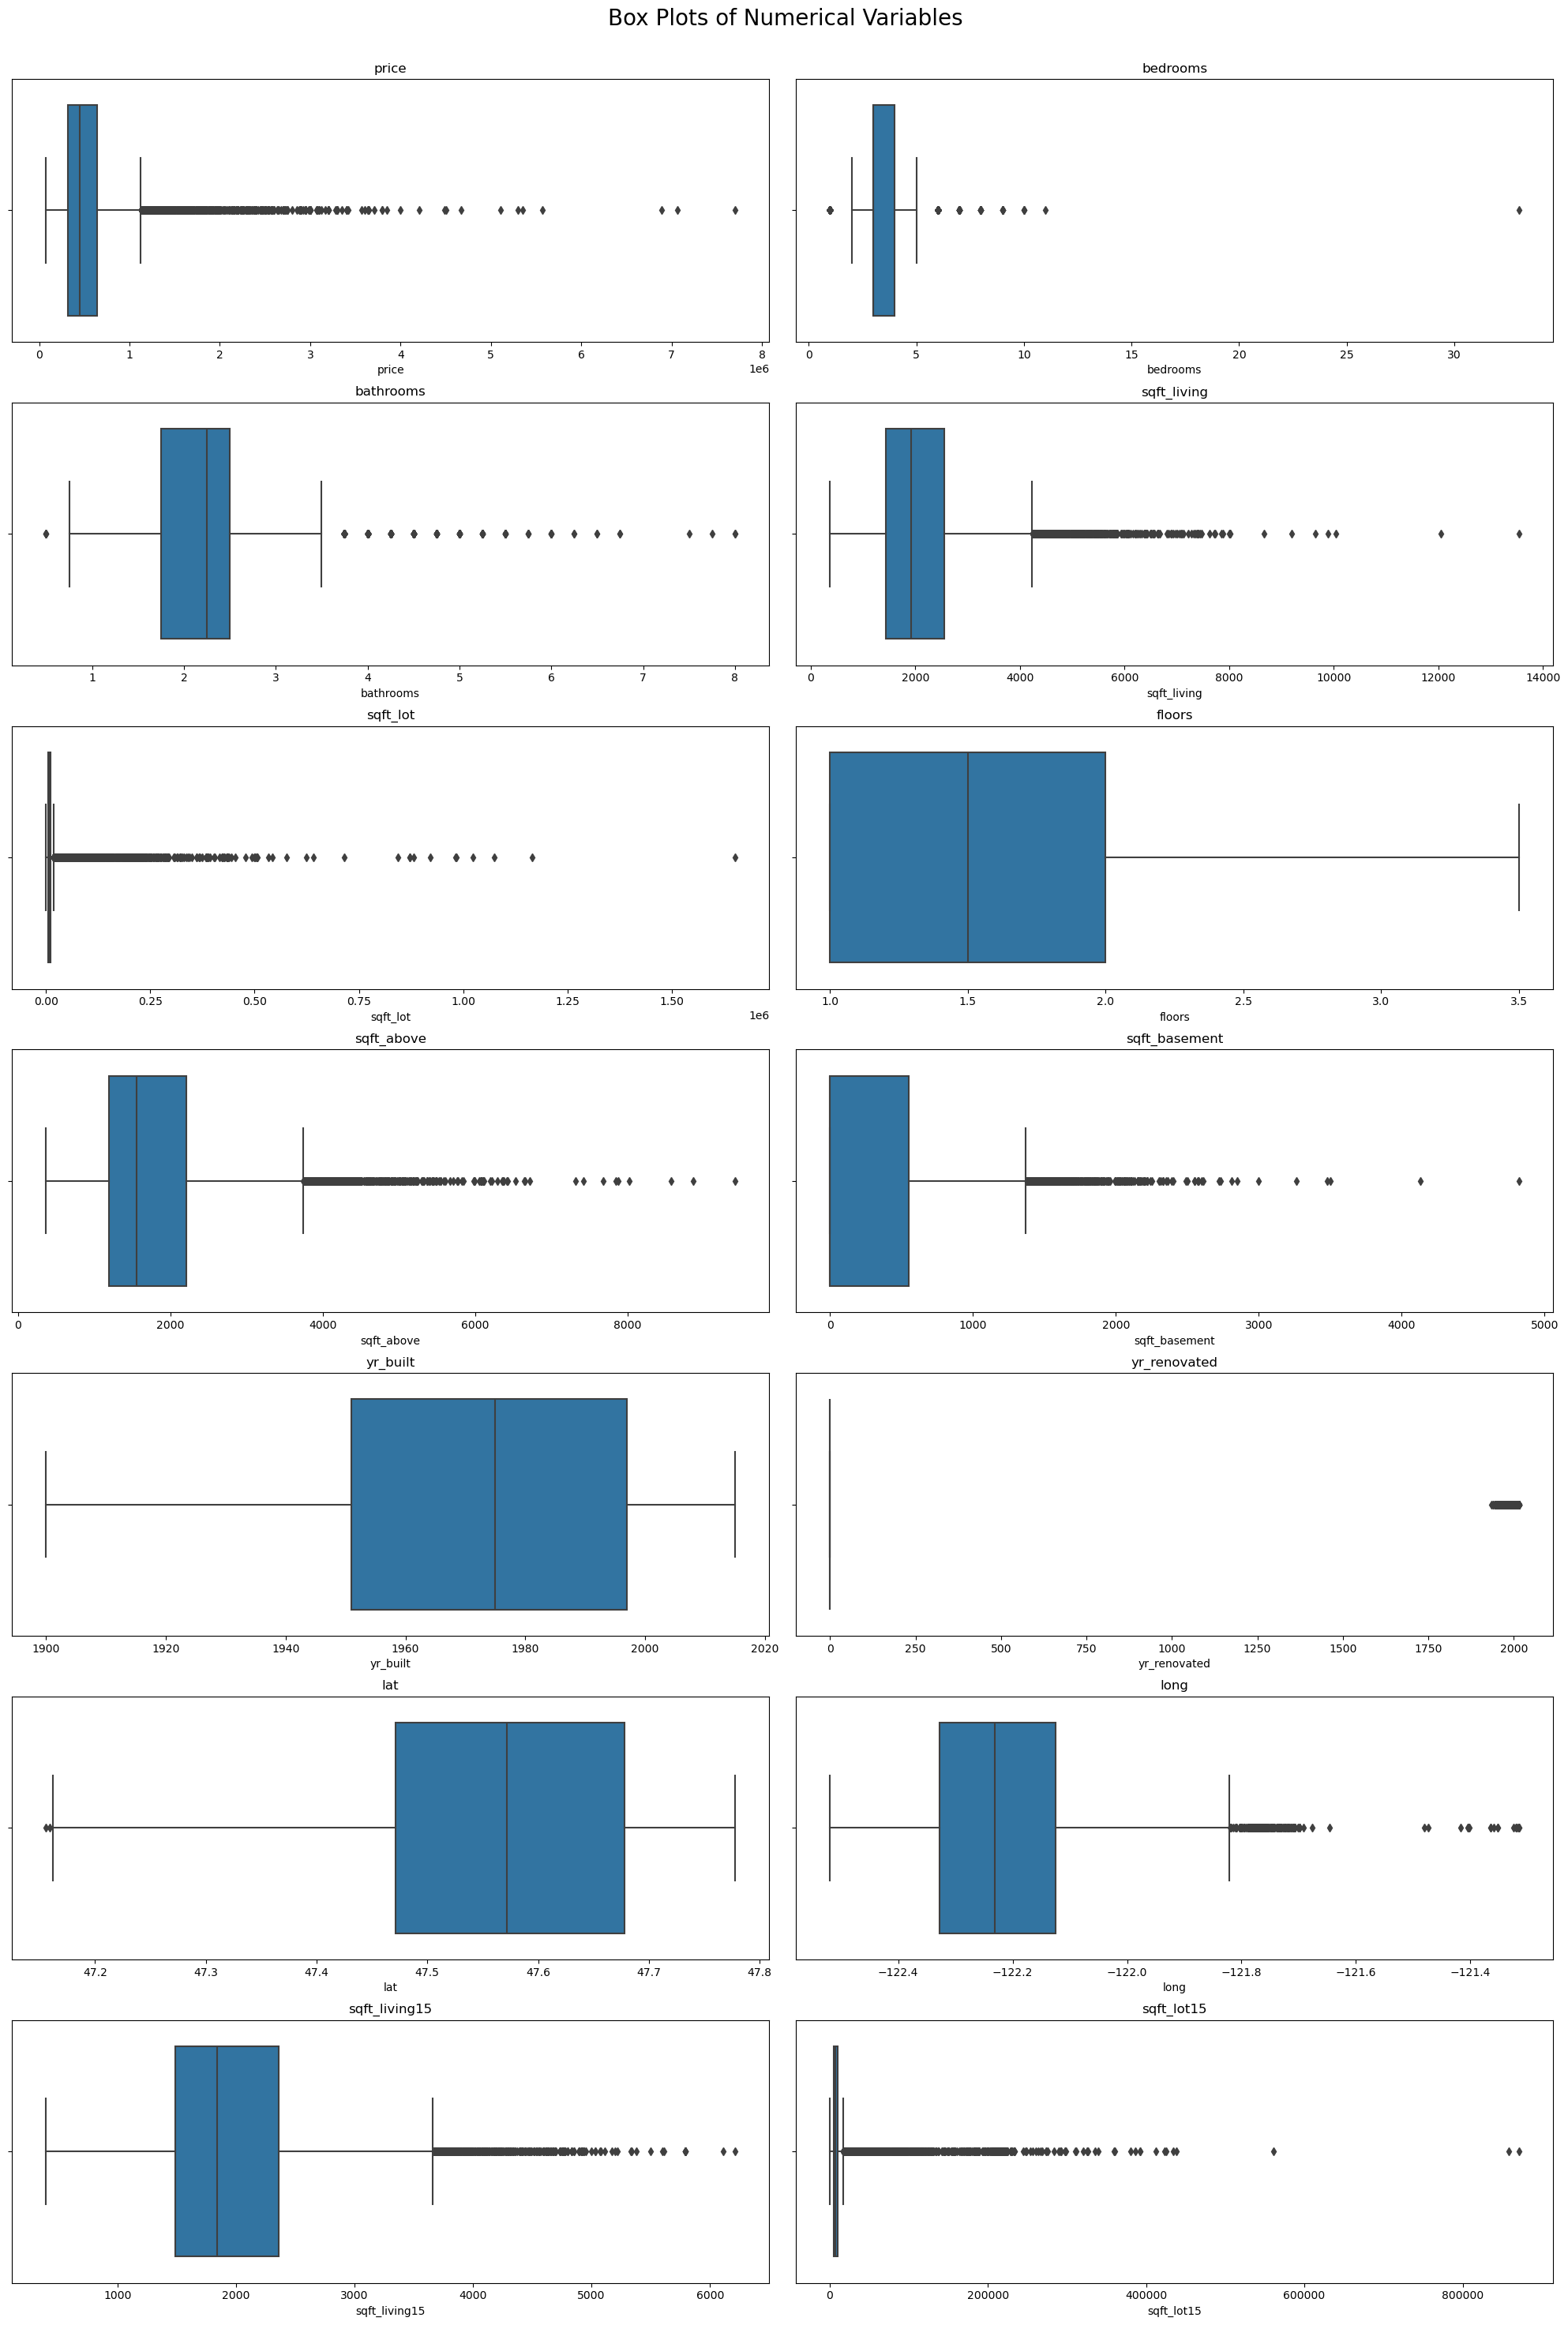

In [69]:
# Create box plots for numerical variables to identify potential outliers
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(20, 30))
fig.suptitle('Box Plots of Numerical Variables', fontsize=20)
axes = axes.flatten()

for ax, var in zip(axes, numerical_vars):
    sns.boxplot(x=data[var], ax=ax)
    ax.set_title(var)

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

In [62]:
# Outlier detection using Z-scores
from scipy import stats

# Calculate Z-scores for the selected numerical variables
z_scores = stats.zscore(data[numerical_vars])

# Convert to DataFrame for easier handling
z_scores_df = pd.DataFrame(z_scores, columns=numerical_vars)

# Identify outliers (Z-score > 3 or < -3)
outliers = z_scores_df[(z_scores_df > 3) | (z_scores_df < -3)].dropna(how='all')

# Count the number of outliers per variable
outlier_counts = outliers.count()

# Display the outlier counts
outlier_counts


price            406
bedrooms          62
bathrooms        187
sqft_living      248
sqft_lot         346
floors             7
sqft_above       253
sqft_basement    246
yr_built           0
yr_renovated     744
lat                0
long             232
sqft_living15    236
sqft_lot15       363
dtype: int64

In [63]:
# Remove outliers using Z-scores (threshold > 3 or < -3)
data_clean = data[(z_scores_df < 3).all(axis=1) & (z_scores_df > -3).all(axis=1)]

# Check the shape of the data before and after outlier removal
original_shape = data.shape
cleaned_shape = data_clean.shape

original_shape, cleaned_shape


((21597, 21), (19388, 21))

The dataset's shape before and after outlier removal:

**Original Shape**: 21,597 rows, 21 columns

**Cleaned Shape**: 19,388 rows, 21 columns